In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


data = pd.read_csv("googleplaystoremaster.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df = data

In [5]:
df['Price'] = df['Price'].replace('Everyone','0')
df['Price'] = df['Price'].str.replace('$', '')
df.Price=pd.to_numeric(df.Price)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
df = df.drop(columns=['Rating', 'Reviews','Size','Installs','Content Rating',
                        'Genres', 'Last Updated', 'Current Ver','Android Ver'])
df.head()

,App,Category,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,0.0
1,Coloring book moana,ART_AND_DESIGN,Free,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,0.0


In [9]:
df_entertainment = df.set_index('Category', append=True, drop=False).xs('ENTERTAINMENT', level=1)

In [10]:
df_productivity = df.set_index('Category', append=True, drop=False).xs('PRODUCTIVITY', level=1)

In [11]:
df_social = df.set_index('Category', append=True, drop=False).xs('SOCIAL', level=1)

In [12]:
df_merged = pd.concat([df_entertainment,df_productivity,df_social])

In [13]:
df_merged.head()

,App,Category,Type,Price
855,Netflix,ENTERTAINMENT,Free,0.0
856,Complete Spanish Movies,ENTERTAINMENT,Free,0.0
857,Pluto TV - It’s Free TV,ENTERTAINMENT,Free,0.0
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,Free,0.0
859,YouTube Kids,ENTERTAINMENT,Free,0.0


## How Many Apps in Entertainment, Productivity & Social Categories?

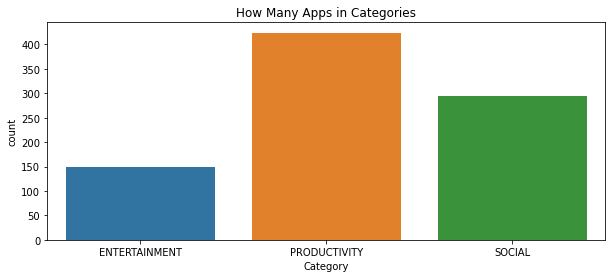

In [14]:
fig = plt.figure(figsize = (10,4))
plt.tight_layout()
plt.title('How Many Apps in Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
sns.countplot(x ='Category', data = df_merged)
plt.show()

## How Many are Free vs Paid Within Each Category?

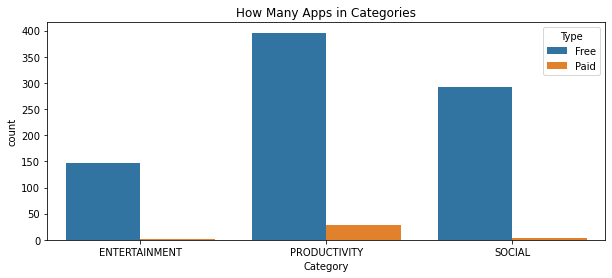

In [15]:
fig = plt.figure(figsize = (10,4))
plt.tight_layout()
plt.title('How Many Apps in Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
sns.countplot(x ='Category', hue = "Type", data = df_merged)
plt.show()

## Which app in each category is the highest priced and which app is the lowest price.

In [16]:
df_entertainment=df_entertainment[(df_entertainment['Price']>0)] 

In [17]:
df_entertainmentmax = df_entertainment[df_entertainment.Price == df_entertainment.Price.max()]

In [18]:
df_entertainmentmin = df_entertainment[df_entertainment.Price == df_entertainment.Price.min()]

In [19]:
df_entertainmentminmax = pd.concat([df_entertainmentmax, df_entertainmentmin])

In [20]:
df_entertainmentminmax

,App,Category,Type,Price
995,My Talking Pet,ENTERTAINMENT,Paid,4.99
1001,Meme Generator,ENTERTAINMENT,Paid,2.99


In [21]:
df_productivity=df_productivity[(df_productivity['Price']>0)] 

In [22]:
df_productivitymax = df_productivity[df_productivity.Price == df_productivity.Price.max()]


In [23]:
df_productivitymin = df_productivity[df_productivity.Price == df_productivity.Price.min()]

In [24]:
df_productivityminmax = pd.concat([df_productivitymax, df_productivitymin])

In [25]:
df_productivityminmax

,App,Category,Type,Price
6692,cronometra-br,PRODUCTIVITY,Paid,154.99
5777,F05WatchFace for Android Wear,PRODUCTIVITY,Paid,0.99
6292,BI Barcode Scanner,PRODUCTIVITY,Paid,0.99
7390,CI Attendance,PRODUCTIVITY,Paid,0.99
8359,Diseño de columnas NTC - RSEE 2017,PRODUCTIVITY,Paid,0.99
8526,DL Image Manager,PRODUCTIVITY,Paid,0.99


In [26]:
df_social=df_social[(df_social['Price']>0)] 

In [27]:
df_socialmax=df_social[df_social.Price == df_social.Price.max()]

In [28]:
df_socialmin= df_social[df_social.Price == df_social.Price.min()]

In [29]:
df_socialminmax = pd.concat([df_socialmax, df_socialmin])

In [30]:
df_socialminmax

,App,Category,Type,Price
5307,Ak Parti Yardım Toplama,SOCIAL,Paid,13.99
4721,W-History Standalone,SOCIAL,Paid,0.99
4971,WhatsFake Pro (Ad free),SOCIAL,Paid,0.99


In [31]:
df_maxprice = pd.concat([df_socialmax, df_productivitymax, df_entertainmentmax])

In [32]:
df_maxprice

,App,Category,Type,Price
5307,Ak Parti Yardım Toplama,SOCIAL,Paid,13.99
6692,cronometra-br,PRODUCTIVITY,Paid,154.99
995,My Talking Pet,ENTERTAINMENT,Paid,4.99


In [33]:
df_minprice = pd.concat([df_socialmin, df_productivitymin, df_entertainmentmin])

In [34]:
df_minprice 

,App,Category,Type,Price
4721,W-History Standalone,SOCIAL,Paid,0.99
4971,WhatsFake Pro (Ad free),SOCIAL,Paid,0.99
5777,F05WatchFace for Android Wear,PRODUCTIVITY,Paid,0.99
6292,BI Barcode Scanner,PRODUCTIVITY,Paid,0.99
7390,CI Attendance,PRODUCTIVITY,Paid,0.99
8359,Diseño de columnas NTC - RSEE 2017,PRODUCTIVITY,Paid,0.99
8526,DL Image Manager,PRODUCTIVITY,Paid,0.99
1001,Meme Generator,ENTERTAINMENT,Paid,2.99


## Highest Priced Apps by Category

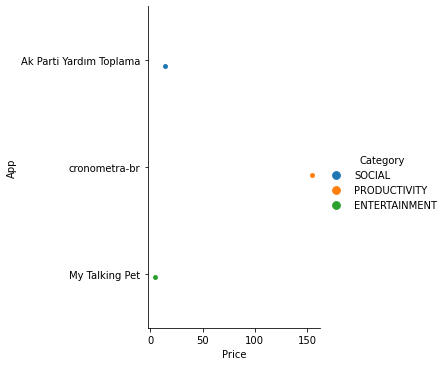

In [35]:
# count plot on single categorical variable
sns.catplot( x="Price",y = "App", hue="Category", data = df_maxprice) 
# Show the plot
plt.show()

## Lowest Priced Apps by Category

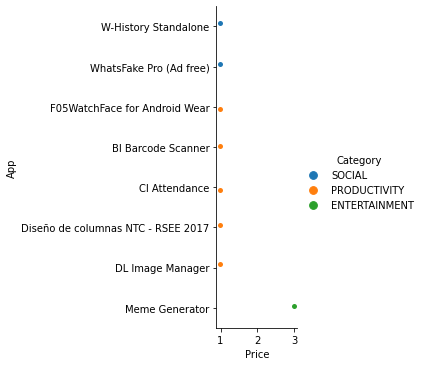

In [36]:
# count plot on single categorical variable
sns.catplot(  x="Price",y = "App", hue="Category", data = df_minprice) 
# Show the plot
plt.show()

## List out which apps are the highest priced and what they're price is and the lowest price can be a number range such as 1-50.

In [37]:
df_maxprice

,App,Category,Type,Price
5307,Ak Parti Yardım Toplama,SOCIAL,Paid,13.99
6692,cronometra-br,PRODUCTIVITY,Paid,154.99
995,My Talking Pet,ENTERTAINMENT,Paid,4.99


In [38]:
df_minprice

,App,Category,Type,Price
4721,W-History Standalone,SOCIAL,Paid,0.99
4971,WhatsFake Pro (Ad free),SOCIAL,Paid,0.99
5777,F05WatchFace for Android Wear,PRODUCTIVITY,Paid,0.99
6292,BI Barcode Scanner,PRODUCTIVITY,Paid,0.99
7390,CI Attendance,PRODUCTIVITY,Paid,0.99
8359,Diseño de columnas NTC - RSEE 2017,PRODUCTIVITY,Paid,0.99
8526,DL Image Manager,PRODUCTIVITY,Paid,0.99
1001,Meme Generator,ENTERTAINMENT,Paid,2.99
